In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Image shape: (720, 1280, 4)


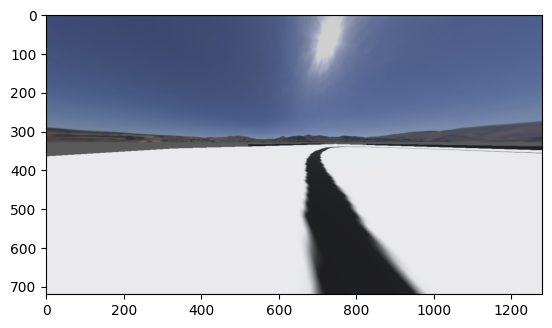

In [22]:
image = plt.imread('images/output_image0.png')
print(f"Image shape: {image.shape}")
plt.imshow(image)
plt.show()

In [3]:
print(f"Min value: {np.min(image)}")
print(f"Max value: {np.max(image)}")

Min value: 0.11372549086809158
Max value: 1.0


In [4]:
image *= 255

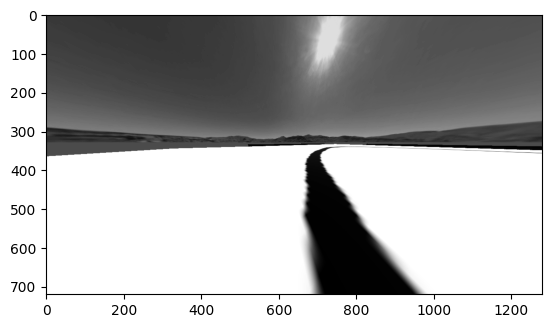

In [5]:
# turn image into 8-bit grey image
image = image.astype(np.uint8)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image, cmap='gray')
plt.show()

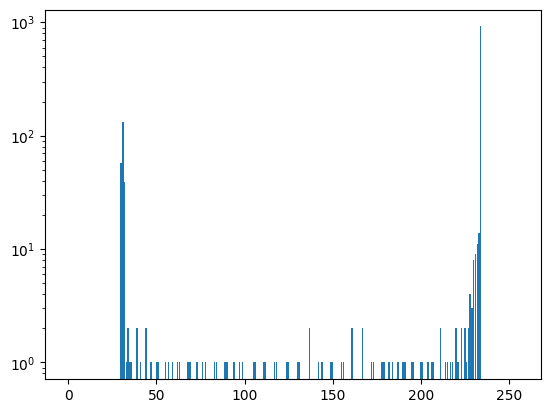

In [6]:
# plot histogram of the bottom row of the image in log scale as bar plot
histogram = np.histogram(image[-1], bins=256, range=(0, 256))[0]
plt.bar(range(256), histogram, log=True)
plt.show()

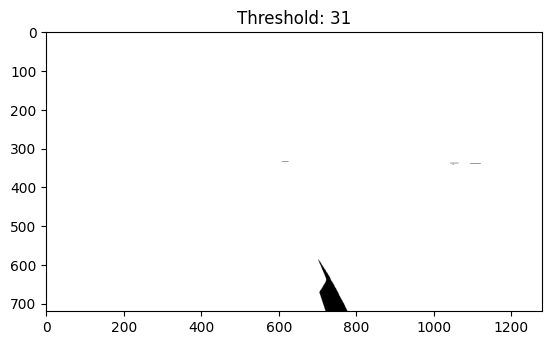

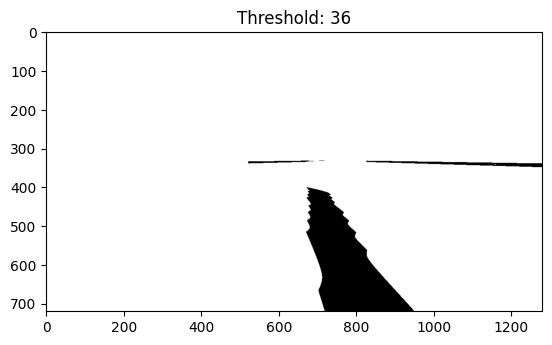

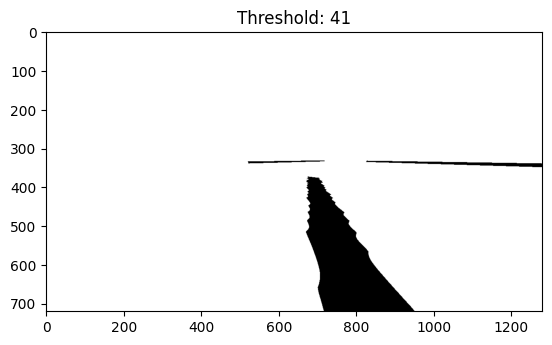

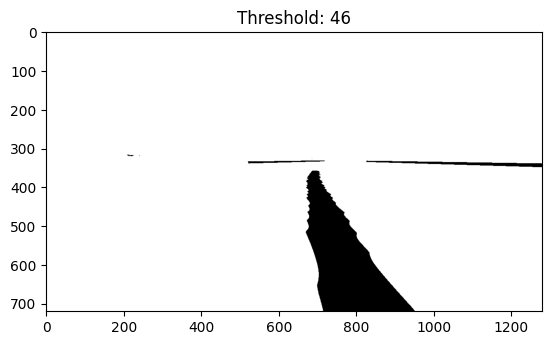

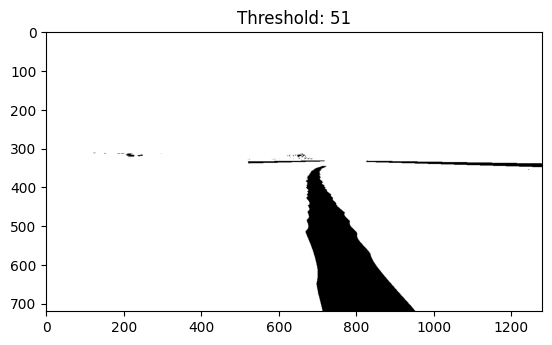

In [7]:
threshold = 50
for threshold in range(31, 55, 5):
    binary_image = np.zeros_like(image)
    binary_image[image < threshold] = 0
    binary_image[image >= threshold] = 255
    plt.imshow(binary_image, cmap='gray')
    plt.title(f"Threshold: {threshold}")
    plt.show()

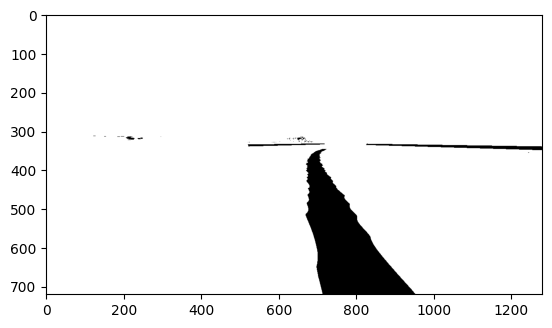

In [10]:
threshold = 51
binary_image = np.zeros_like(image)
binary_image[image < threshold] = 0
binary_image[image >= threshold] = 255
plt.imshow(binary_image, cmap='gray')
plt.show()

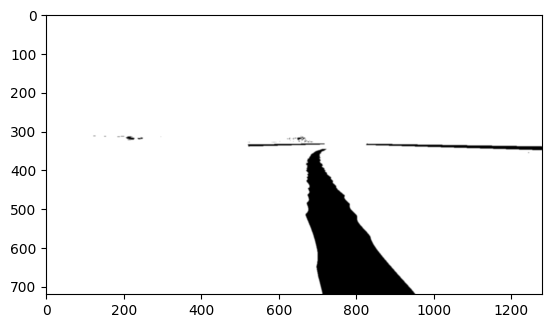

In [11]:
# gaussian blur
gaussian_blur = cv2.GaussianBlur(binary_image, (5, 5), 0)
plt.imshow(gaussian_blur, cmap='gray')
plt.show()

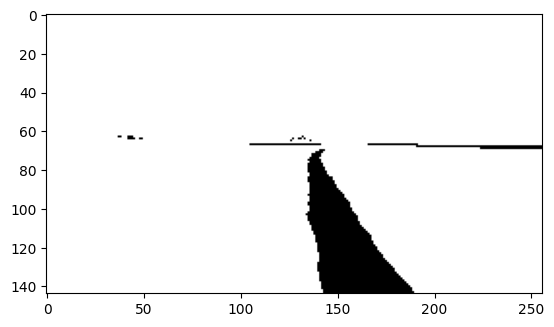

In [17]:
max_pooling = cv2.resize(binary_image, (0, 0), fx=0.2, fy=0.2, interpolation=cv2.INTER_NEAREST)
plt.imshow(max_pooling, cmap='gray')
plt.show()

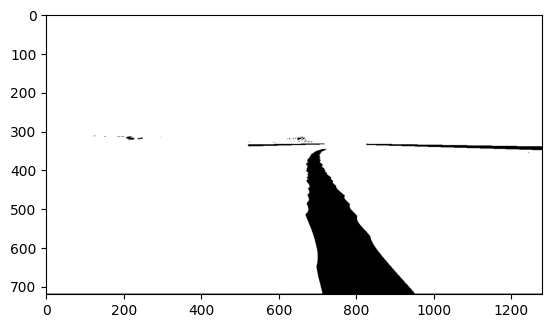

Unique labels: [0 1]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [0 0 0 ... 0 0 0]]


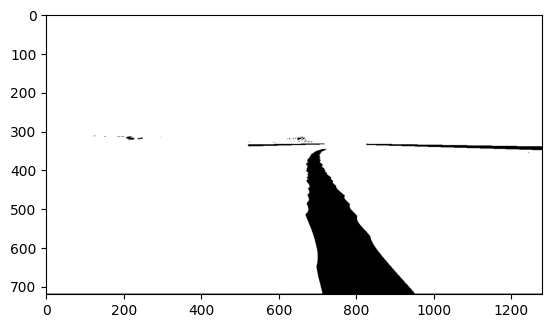

In [37]:
binary_image_with_border = np.copy(binary_image)
binary_image_with_border[-1, :] = 0
plt.imshow(binary_image_with_border, cmap='gray')
plt.show()
num_labels, labels = cv2.connectedComponents(binary_image_with_border)

print(f"Unique labels: {np.unique(labels)}")
print(labels)
plt.imshow(labels, cmap='gray')
plt.show()

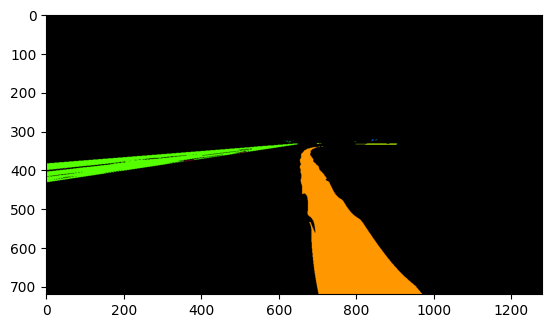

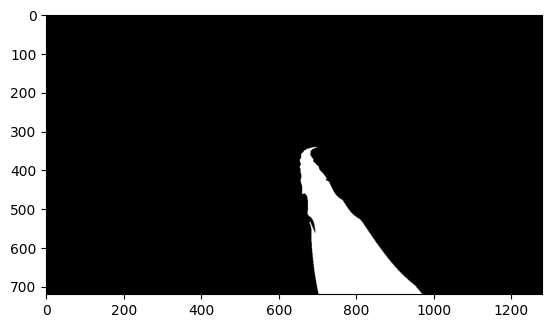

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/output_image5.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img *= 255
img = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)[1]
# convert to 8-bit
img = img.astype(np.uint8)
# reverse image
img = cv2.bitwise_not(img)
plt.imshow(img, cmap='gray')
num_labels, labels_im = cv2.connectedComponents(img)

def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    plt.imshow(labeled_img)
    plt.show()

def remove_non_bottom_row_components(labels):
    bottom_row = labels[-1]
    bottom_labels = np.unique(bottom_row)
    for label in bottom_labels:
        if label != 0:
            labels[labels != label] = 0
    return labels

imshow_components(labels_im)
processed_labels = remove_non_bottom_row_components(labels_im)
plt.imshow(processed_labels, cmap='gray')
plt.show()

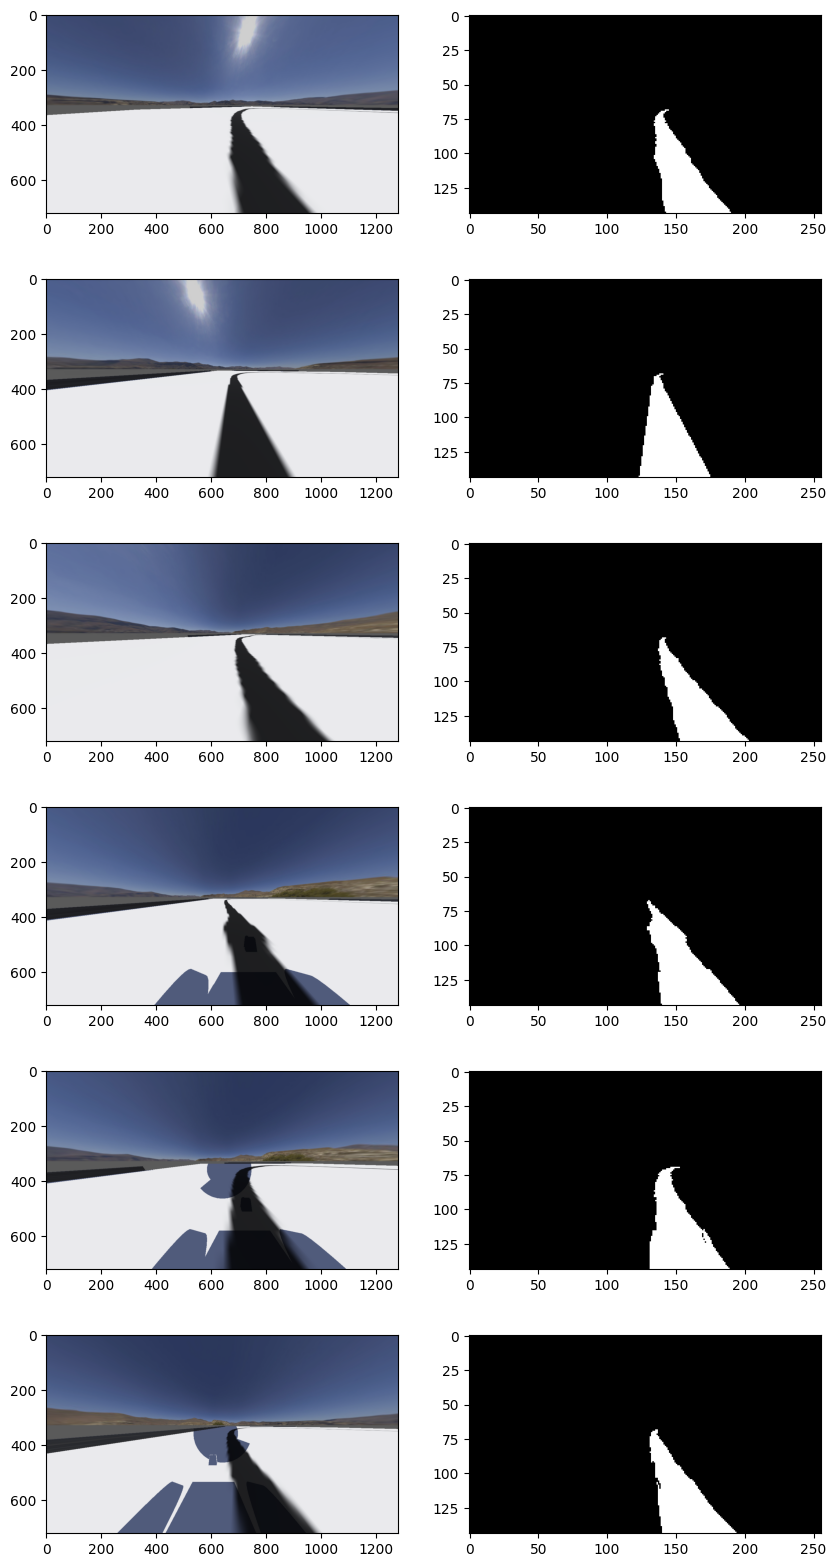

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_line(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # resize image
    img = cv2.resize(img, (0, 0), fx=0.2, fy=0.2)
    # convert to 8-bit
    img *= 255
    img = img.astype(np.uint8)
    # binary threshold
    img = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)[1]
    img = cv2.bitwise_not(img)

    # connected components
    _, labels = cv2.connectedComponents(img)

    # remove non-bottom row components
    bottom_row = labels[-1]
    bottom_labels = np.unique(bottom_row)
    for label in bottom_labels:
        if label != 0:
            labels[labels != label] = 0

    return labels

In [ ]:
images = [plt.imread(f'images/output_image{i}.png') for i in range(6)]
fig, axs = plt.subplots(6, 2)
fig.set_size_inches(10, 20)

for i, image in enumerate(images):
    labels = extract_line(image)
    axs[i, 0].imshow(image)
    axs[i, 1].imshow(labels, cmap='gray')

plt.show()

# Linear Regression

In [19]:
def find_line(processed_image, show_plot=False):
    rotated_image = cv2.rotate(processed_image, cv2.ROTATE_90_CLOCKWISE)
    y, x = np.where(rotated_image > 0)
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    if show_plot:
        plt.imshow(rotated_image, cmap='gray')
        plt.plot(x, m*x + c, 'r')
        plt.show()
    return m, c

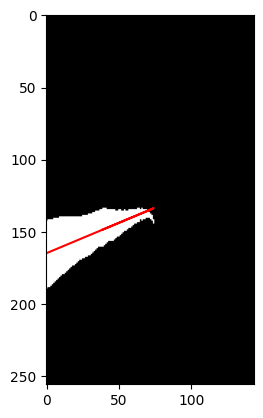

m: -0.41907098034043877
c: 164.5964455551529


In [ ]:
image = plt.imread('images/output_image0.png')
processed_image = extract_line(image)
m, c = find_line(processed_image, show_plot=True)
print(f"m: {m}")
print(f"c: {c}")

In [20]:
from time import time

images = [extract_line(plt.imread(f'images/output_image{i}.png')) for i in range(6)]
start = time()
results = [find_line(image) for image in images]
end = time()

print(f"Time taken: {end - start} seconds")
print(f"Average time taken: {(end - start) / len(images)} seconds")
print(results)

Time taken: 0.0009932518005371094 seconds
Average time taken: 0.0001655419667561849 seconds
[(-0.41907098034043877, 164.5964455551529), (-0.19288174702310948, 148.86531206308612), (-0.5596029471298277, 176.7075331845689), (-0.48793191800393465, 167.28347618827252), (-0.2778883035928205, 158.6517990960793), (-0.47155558448751583, 165.77637505936343)]


In [6]:
def get_line_width_and_height(processed_image):
    row_has_data = np.any(processed_image, axis=1)
    height = np.sum(row_has_data)
    width = np.sum(processed_image[-1] > 0)
    return width, height

image = plt.imread('images/output_image0.png')
processed_image = extract_line(image)
width, height = get_line_width_and_height(processed_image)
print(f"Width: {width}")
print(f"Height: {height}")

Width: 47
Height: 75


[ 0.         45.4132749  64.49533126 75.        ]


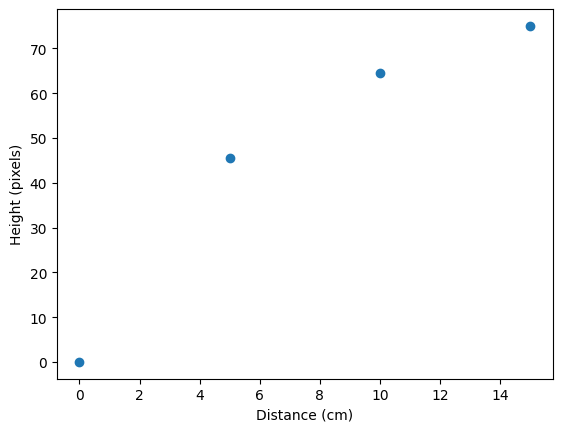

In [41]:
line_length = 75
camera_h = 7
fov = 2.79253
f = line_length / (2 * np.tan(fov / 2))
angle = 0.261799

distances = list(range(0, 20, 5))

ys = [f * (d * np.sin(angle)) / (camera_h + d * np.cos(angle)) for d in distances]
ys = np.array(ys)
ys /= ys.max()
ys *= line_length
print(ys)
plt.scatter(distances, ys)
plt.xlabel('Distance (cm)')
plt.ylabel('Height (pixels)')
plt.show()

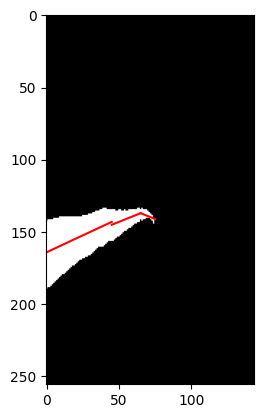

Image 0
ms: [-0.4635084473613556, -0.3960696277390397, 0.4251839201261223]
cs: [164.79171149262692, 145.6130252427788, 137.26727535470306]


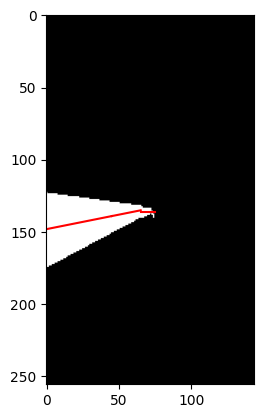

Image 1
ms: [-0.198078339409957, -0.19775029311812306, 0.05646711012562904]
cs: [148.7787349913097, 139.88327009232444, 136.3930524759794]


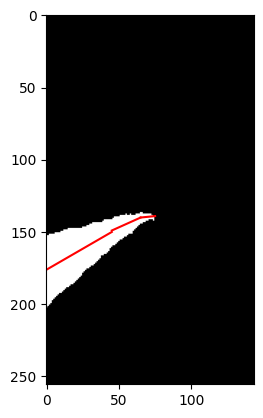

Image 2
ms: [-0.5705485197992973, -0.4488286854155598, -0.06451088722781793]
cs: [176.31171663810903, 149.82230312678104, 140.41273968150807]


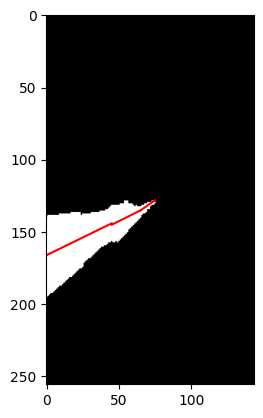

Image 3
ms: [-0.4976717365533651, -0.4778261451101008, -0.661232806928164]
cs: [166.9139053513609, 145.06689485779594, 135.14111054508408]


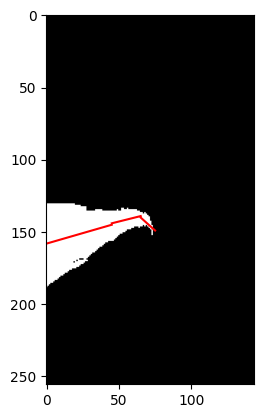

Image 4
ms: [-0.28600333221945695, -0.2750078604480015, 0.896619821805821]
cs: [158.5067610200995, 144.99274662302093, 140.1631762652705]


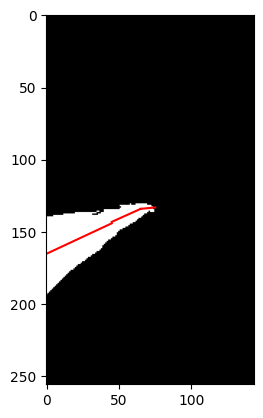

Image 5
ms: [-0.46704663452623324, -0.46141026291973747, -0.05757655064116736]
cs: [165.2224932777475, 143.6625738836439, 134.49097095001306]


In [71]:
def find_3_lines(image, plot=False):
    segments = [
        (0, 45),
        (45, 65),
        (65, 75),
    ]
    ms = []
    cs = []

    for start, end in segments:
        # print(f"Start: {start}, End: {end}")
        image_segment = image[143 - end:143 - start]
        m, c = find_line(image_segment)
        ms.append(m)
        cs.append(c)

    if plot:
        # plot the lines
        rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
        plt.imshow(rotated_image, cmap='gray')
        for i in range (len(ms)):
            m = ms[i]
            c = cs[i]
            start = segments[i][0]
            end = segments[i][1]
            start_point = (start, int(c))
            end_point = (end, int(m * (end - start) + c))
            # print(f"Start point: {start_point}")
            # print(f"End point: {end_point}")
            plt.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], 'r')
        plt.show()

    return ms, cs

for i in range(6):
    image = plt.imread(f'images/output_image{i}.png')
    processed_image = extract_line(image)
    ms, cs = find_3_lines(processed_image, plot=True)
    print(f"Image {i}")
    print(f"ms: {ms}")
    print(f"cs: {cs}")
    